<a href="https://colab.research.google.com/github/leelaaaaaa/soft-shell-crab-detection/blob/main/YOLOV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cd /content && git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15873 (delta 12), reused 7 (delta 7), pack-reused 15850 (from 3)
Receiving objects: 100% (15873/15873), 14.50 MiB | 18.07 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.


In [ ]:
%cd /content/darknet

/content/darknet


In [ ]:
"/content/darknet/Makefile"

'/content/darknet/Makefile'

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: wa

In [ ]:
import os
import random

# Define paths
image_dir = '/content/drive/MyDrive/Yolo_custom_model_Training/custom_data'  # Path to images
output_dir = '/content/drive/MyDrive/Yolo_custom_model_Training/zip'  # Path to save output files
os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists

train_txt_path = os.path.join(output_dir, 'train.txt')
test_txt_path = os.path.join(output_dir, 'test.txt')
labelled_data_path = os.path.join(output_dir, 'labelled_data.data')

# Get all image files (assuming the images are in JPG or PNG format)
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Shuffle the images to split them randomly
random.shuffle(image_files)

# Define split ratio (e.g., 80% for training and 20% for testing)
train_split = 0.8
train_size = int(len(image_files) * train_split)

# Split images into train and test sets
train_images = image_files[:train_size]
test_images = image_files[train_size:]

# Write train.txt with full paths to training images
with open(train_txt_path, 'w') as f:
    for image in train_images:
        image_path = os.path.join(image_dir, image)
        f.write(image_path + '\n')

# Write test.txt with full paths to testing images
with open(test_txt_path, 'w') as f:
    for image in test_images:
        image_path = os.path.join(image_dir, image)
        f.write(image_path + '\n')

# Now, create the labelled_data.data file required by YOLO
# This file contains locations for your training and validation data, and class names
with open(labelled_data_path, 'w') as f:
    # Number of classes (2 classes: Crab and Molting_crab)
    f.write('classes = 2\n')

    # Paths to the train.txt and test.txt files
    f.write(f'train = {train_txt_path}\n')
    f.write(f'valid = {test_txt_path}\n')

    # Path to the classes.names file (which contains class names)
    f.write(f'names = {os.path.join(image_dir, "classes.names")}\n')

    # Backup directory for the weights (you can change it if necessary)
    f.write('backup = backup\n')

print(f"Files saved to: {output_dir}")
print("train.txt, test.txt, and labelled_data.data have been created.")



Files saved to: /content/drive/MyDrive/Yolo_custom_model_Training/zip
train.txt, test.txt, and labelled_data.data have been created.


In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2025-01-13 17:41:37--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  18.4MB/s    in 6.8s    

2025-01-13 17:41:44 (22.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train /content/drive/MyDrive/Yolo_custom_model_Training/zip/detector.data /content/drive/MyDrive/Yolo_custom_model_Training/cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 250711, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.749374), count: 4, class_loss = 1.083457, iou_loss = 0.306954, total_loss = 1.390411 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 250715, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.883081), count: 4, class_loss = 0.013310, iou_loss = 0.220075, total_loss = 0.233385 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (ms

In [ ]:
!./darknet detector map /content/drive/MyDrive/Yolo_custom_model_Training/zip/detector.data /content/drive/MyDrive/Yolo_custom_model_Training/cfg/yolov3-custom.cfg /content/drive/MyDrive/Yolo_custom_model_Training/backup/yolov3-custom_final.weights

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 1, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 1

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595

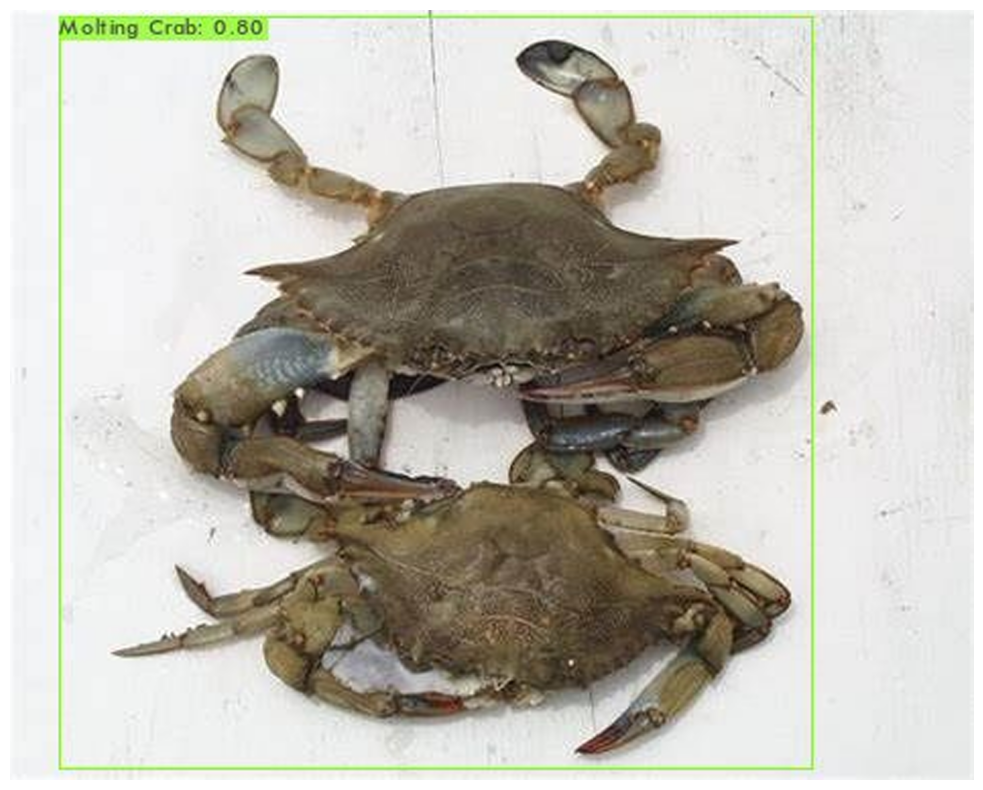

In [ ]:
!./darknet detector test /content/drive/MyDrive/Yolo_custom_model_Training/zip/detector.data /content/drive/MyDrive/Yolo_custom_model_Training/cfg/yolov3-custom.cfg //content/drive/MyDrive/Yolo_custom_model_Training/backup/yolov3-custom_final.weights /content/drive/MyDrive/Yolov4_custom_model_training/custom_data/Molting_crab_107_original.jpg
imShow('predictions.jpg')

In [ ]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
!./darknet detector test /content/drive/MyDrive/Yolo_custom_model_Training/zip/detector.data /content/drive/MyDrive/Yolo_custom_model_Training/cfg/yolov3-custom.cfg //content/drive/MyDrive/Yolo_custom_model_Training/backup/yolov3-custom_final.weights /content/drive/MyDrive/Yolov4_custom_model_training/custom_data/Molting_crab_106_original.jpg
imShow('predictions.jpg')

/bin/bash: line 1: ./darknet: No such file or directory


AttributeError: 'NoneType' object has no attribute 'shape'

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 1, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 10

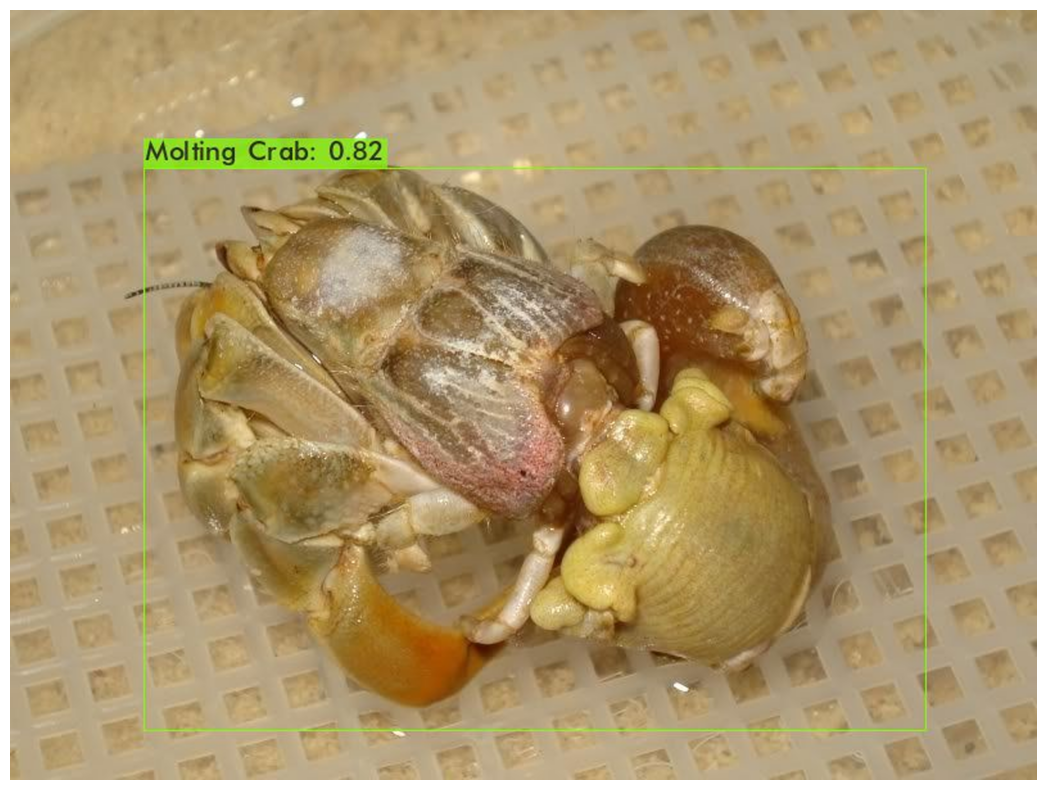

In [ ]:
!./darknet detector test /content/drive/MyDrive/Yolo_custom_model_Training/zip/detector.data /content/drive/MyDrive/Yolo_custom_model_Training/cfg/yolov3-custom.cfg //content/drive/MyDrive/Yolo_custom_model_Training/backup/yolov3-custom_final.weights /content/drive/MyDrive/Yolov4_custom_model_training/test/Molting_crab_7_original.jpg
imShow('predictions.jpg')

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 1, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 10

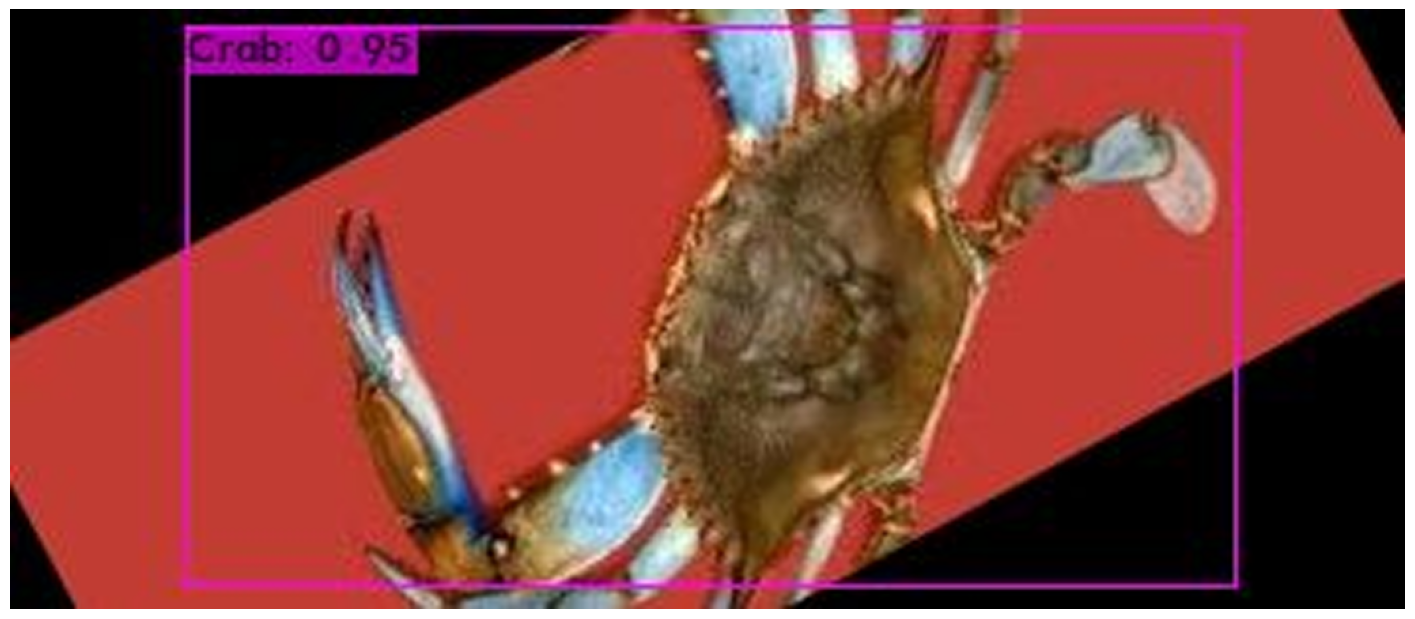

In [ ]:
!./darknet detector test /content/drive/MyDrive/Yolo_custom_model_Training/zip/detector.data /content/drive/MyDrive/Yolo_custom_model_Training/cfg/yolov3-custom.cfg //content/drive/MyDrive/Yolo_custom_model_Training/backup/yolov3-custom_final.weights /content/drive/MyDrive/Yolov4_custom_model_training/test/crab_10_rotation.jpg
imShow('predictions.jpg')

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 1, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 10

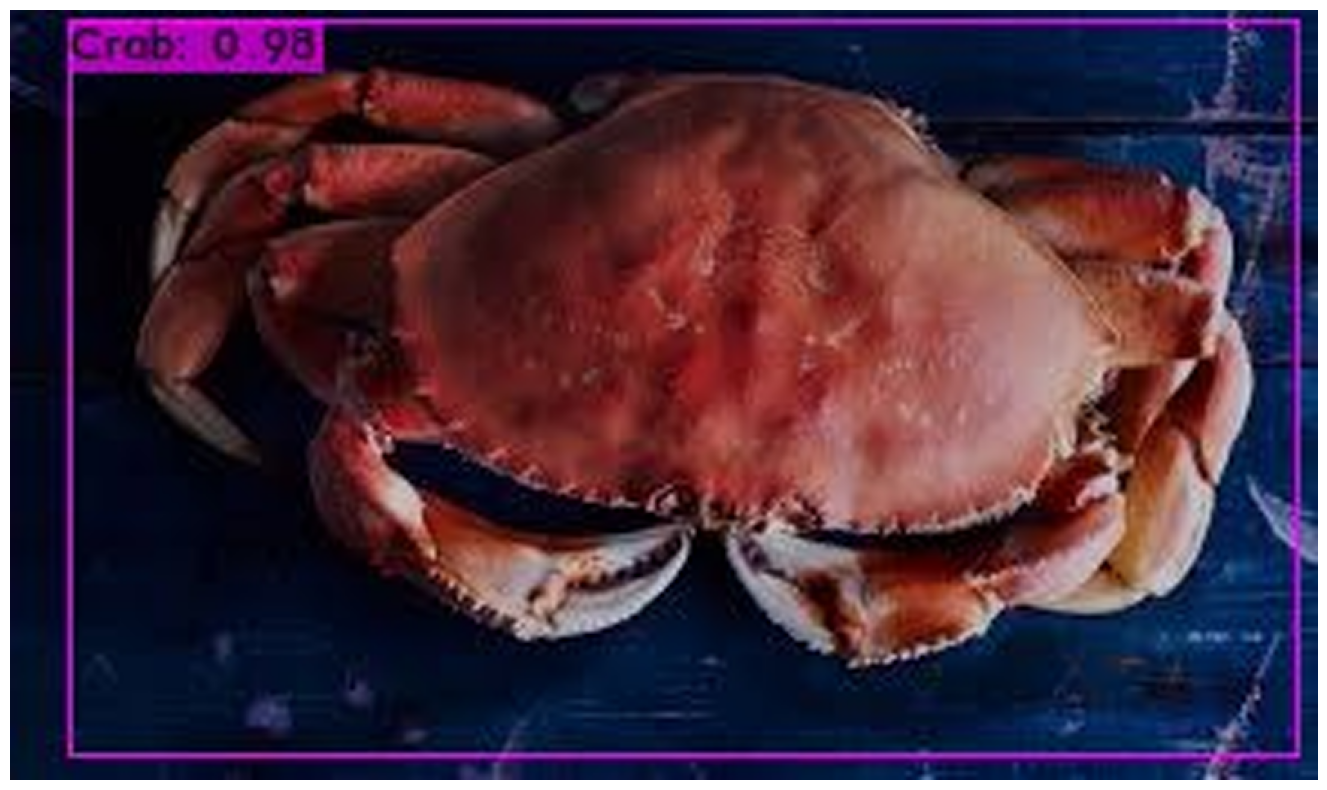

In [ ]:
!./darknet detector test /content/drive/MyDrive/Yolo_custom_model_Training/zip/detector.data /content/drive/MyDrive/Yolo_custom_model_Training/cfg/yolov3-custom.cfg //content/drive/MyDrive/Yolo_custom_model_Training/backup/yolov3-custom_final.weights /content/drive/MyDrive/Yolov4_custom_model_training/test/crab_19_brightness.jpg
imShow('predictions.jpg')

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 1, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 10

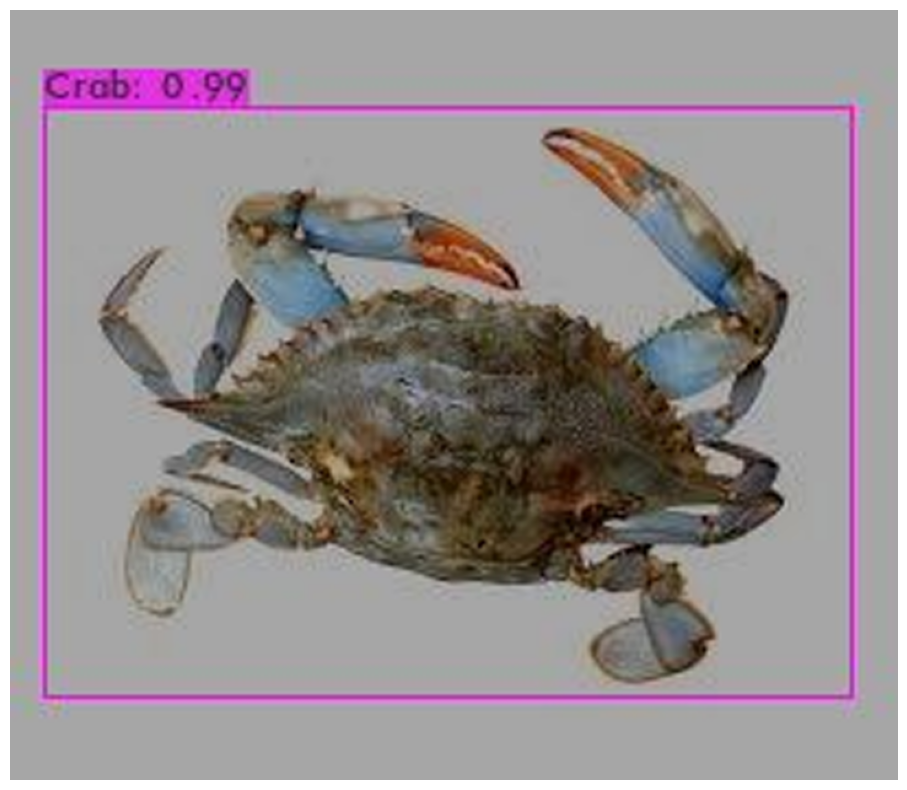

In [ ]:
!./darknet detector test /content/drive/MyDrive/Yolo_custom_model_Training/zip/detector.data /content/drive/MyDrive/Yolo_custom_model_Training/cfg/yolov3-custom.cfg //content/drive/MyDrive/Yolo_custom_model_Training/backup/yolov3-custom_final.weights /content/drive/MyDrive/Yolov4_custom_model_training/test/crab_32_brightness.jpg
imShow('predictions.jpg')

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 1, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 10

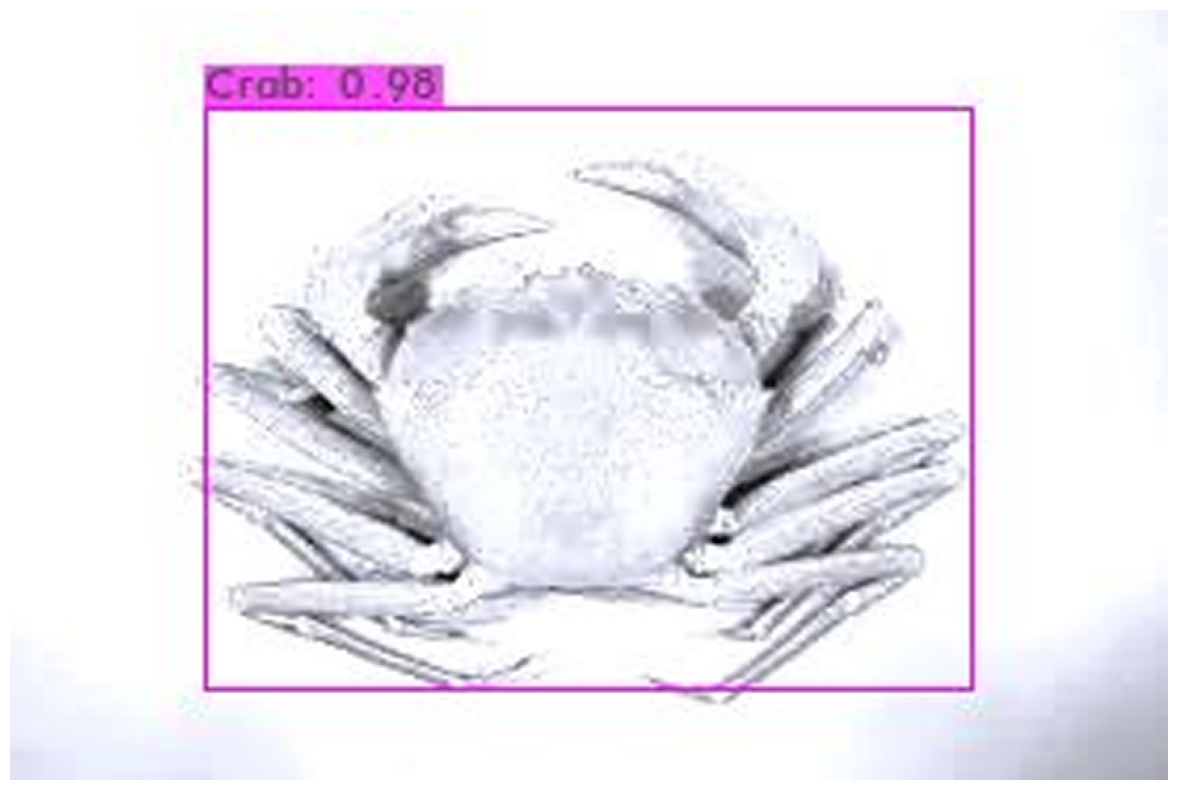

In [ ]:
!./darknet detector test /content/drive/MyDrive/Yolo_custom_model_Training/zip/detector.data /content/drive/MyDrive/Yolo_custom_model_Training/cfg/yolov3-custom.cfg //content/drive/MyDrive/Yolo_custom_model_Training/backup/yolov3-custom_final.weights /content/drive/MyDrive/Yolov4_custom_model_training/test/crab_88_brightness.jpg
imShow('predictions.jpg')

In [ ]:
import os
import shutil

test_images_folder = "/content/drive/MyDrive/Yolov4_custom_model_training/test"  # Folder with test images
output_dir = "/content/drive/MyDrive/Yolo_custom_model_Training/output"  # Folder to save predictions

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List of test images to process
test_images = ['crab_88_brightness.jpg', 'crab_19_brightness.jpg', 'crab_32_brightness.jpg', 'Molting_crab_7_original.jpg', 'Molting_crab_5_flip.jpg', 'Molting_crab_24_rotation.jpg', 'crab_10_rotation.jpg']  # Add your image names here

for image_name in test_images:
    # Create a folder for each image in the output directory
    image_output_folder = os.path.join(output_dir, image_name.split('.')[0])
    if not os.path.exists(image_output_folder):
        os.makedirs(image_output_folder)

    # Run the YOLO inference command
    !./darknet detector test /content/drive/MyDrive/Yolo_custom_model_Training/zip/detector.data /content/drive/MyDrive/Yolo_custom_model_Training/cfg/yolov3-custom.cfg /content/drive/MyDrive/Yolo_custom_model_Training/backup/yolov3-custom_final.weights {os.path.join(test_images_folder, image_name)}

    # Check if predictions.jpg exists after inference
    if os.path.exists("predictions.jpg"):
        # Move the prediction to the created folder
        predicted_image_name = f"predicted_{image_name}"
        shutil.move("predictions.jpg", os.path.join(image_output_folder, predicted_image_name))
        print(f"Saved the predicted image as {predicted_image_name} in {image_output_folder}")
    else:
        print(f"Prediction file for {image_name} not found!")


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 800, cudnn_half = 1, GPU: NVIDIA A100-SXM4-40GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 10